In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

# we use the scikit svm model for this experiment 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import scikitplot as skplt

import sys
sys.path.append('../../data/')
import cleaner as dc

In [6]:
df = pd.read_csv('data/persuasion_dataset.csv') 
df.shape

(13114, 2)

In [7]:
# Lower case
df['ad']= df['ad'].apply(lambda x: x.lower())

# Removing punctuations
df['ad']= df['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df['ad']= df['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df['ad']= df['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df['ad']= df['ad'].apply(dc.denoise_text)

##Remove stopwords 
df['ad']= df['ad'].apply(dc.remove_stopwords)

#Remove special characters
df['ad']= df['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df['lemmatized']= df['ad'].apply(dc.simple_lemmatizer)

In [8]:
X_train, X_test,  y_train, y_test= train_test_split(df['lemmatized'], df['label'], test_size =0.2, random_state=42)

In [9]:
tf_vectorizer = CountVectorizer() 

X_train_tf = tf_vectorizer.fit_transform(X_train)
X_test_tf = tf_vectorizer.transform(X_test)

In [10]:
# training the model using a linear kernal
clf = svm.SVC(kernel='linear')
clf.fit(X_train_tf, y_train)

SVC(kernel='linear')

accuracy:   0.929
               precision    recall  f1-score   support

no-persuasion       0.93      0.93      0.93      1314
   persuasion       0.93      0.93      0.93      1309

     accuracy                           0.93      2623
    macro avg       0.93      0.93      0.93      2623
 weighted avg       0.93      0.93      0.93      2623

confusion matrix:
[[1220   94]
 [  92 1217]]



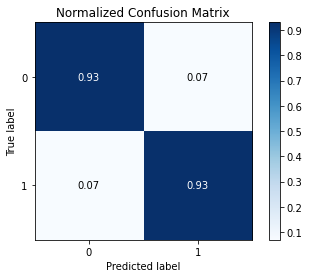

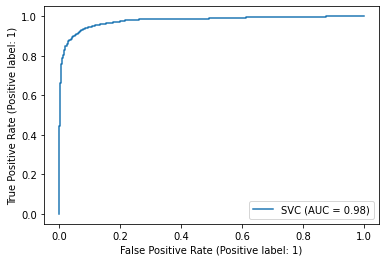

In [11]:
# predict the labels on validation dataset
predictions = clf.predict(X_test_tf)

# compute the performance measures
score = metrics.accuracy_score(y_test, predictions)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_test, predictions, target_names=['no-persuasion', 'persuasion']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, predictions))
print()
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
plt.show()
svc_disp = metrics.RocCurveDisplay.from_estimator(clf, X_test_tf, y_test)

In [18]:
df_val=pd.read_csv("data/sample_persuasion.csv")
df_val

,label,ad
0,1,adopting eco friendly solutions has become pop...
1,1,americans are suffering from the worst inflati...
2,1,you can help rescue bears like clara\nshe was ...
3,1,a perfect storm of conflict climate and covid ...
4,1,a storm of conflict climate and covid is causi...
...,...,...
314,0,do the work like our page
315,1,a healthy ocean can combat the climate crisis ...
316,1,ukrainian jews are in danger provide emergency...
317,0,33 unique people whose genetics made them rema...


In [20]:
# Lower case
df_val['ad']= df_val['ad'].apply(lambda x: x.lower())

# Removing punctuations
df_val['ad']= df_val['ad'].str.replace('[^\w\s]','', regex=True)

# Removing numbers
df_val['ad']= df_val['ad'].str.replace('\d+','',regex=True)

# Removing extra space 
df_val['ad']= df_val['ad'].str.replace('\s+', ' ',  regex=True)

#Apply denoise function
df_val['ad']= df_val['ad'].apply(dc.denoise_text)

##Remove stopwords 
df_val['ad']= df_val['ad'].apply(dc.remove_stopwords)

#Remove special characters
df_val['ad']= df_val['ad'].apply(dc.remove_special_characters)

#Simple stemming 
df_val['lemmatized']= df_val['ad'].apply(dc.simple_lemmatizer)

accuracy:   0.743
                precision    recall  f1-score   support

non persuasive       0.59      0.35      0.44        92
    persuasive       0.77      0.90      0.83       227

      accuracy                           0.74       319
     macro avg       0.68      0.63      0.64       319
  weighted avg       0.72      0.74      0.72       319

confusion matrix:
[[ 32  60]
 [ 22 205]]



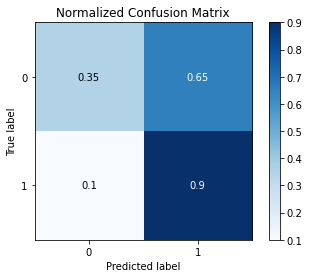

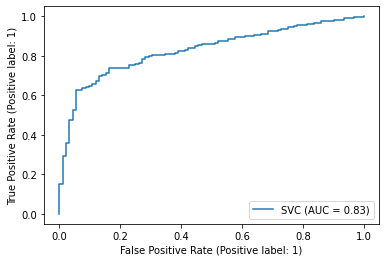

In [21]:
X_val = tf_vectorizer.transform(df_val['lemmatized'])
y_val = df_val['label']

y_pred = clf.predict(X_val)

score = metrics.accuracy_score(y_val, y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(y_val, y_pred, target_names=[ 'non persuasive', 'persuasive']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_val, y_pred))
print()

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)
plt.show()
disp = metrics.RocCurveDisplay.from_estimator(clf, X_val, y_val)